In [1]:
import numpy as np
from numpy.random import multivariate_normal as mvn 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import animation, rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline

In [32]:
def calc_covariance_matrix(X1,X2):
    """
    Calculate the covariance matrix of a squared-exponential kernel
    """
    
    covariance = np.repeat(0, len(X1)*len(X2)).reshape(len(X1),len(X2)).astype(float)

    for i in range(len(X1)):
        for j in range(len(X2)):
            covariance[i,j] = np.exp(-0.5*(abs(X1[i]-X2[j]))**2)
            #covariance[i,j] = np.minimum(X1[i],X2[j])
            #covariance[i,j] = np.exp(-(np.sin(X1[i]-X2[j])/2))
            
    return covariance


In [33]:
x_vals = np.linspace(-10,10,100)
sigma = calc_covariance_matrix(x_vals,x_vals)

In [34]:
n_samples = 4
y_vals = np.repeat(0,len(x_vals)*n_samples).reshape(len(x_vals),n_samples).astype(float)
for i in range(n_samples):
    # Each column represents a sample from a multivariate normal distribution
    # with zero mean and covariance sigma
    y_vals[:,i] = mvn(np.repeat(0,len(x_vals)),sigma)


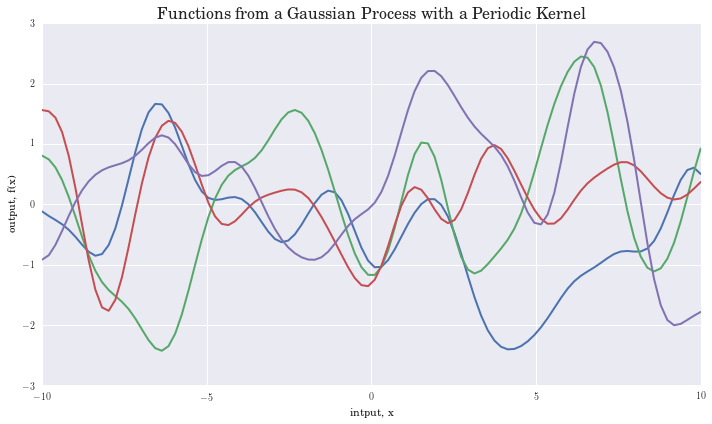

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
plt.plot(x_vals,y_vals,linewidth=2)
plt.title("Functions from a Gaussian Process with a Periodic Kernel",size=16)
plt.ylabel("output, f(x)")
plt.xlabel("intput, x")
plt.show()

In [36]:
def calculate_kernels(xs,x_vals):

    k_xx = calc_covariance_matrix(xs,xs)
    k_xxs = calc_covariance_matrix(xs,x_vals)
    k_xsx = calc_covariance_matrix(x_vals,xs)
    k_xsxs = calc_covariance_matrix(x_vals,x_vals)
    
    return k_xx, k_xxs, k_xsx, k_xsxs

In [37]:
def random_function(x):
    return np.sin(x)*x + 4

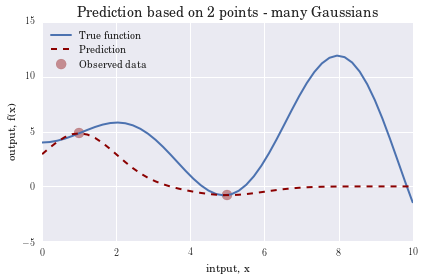

In [38]:
x_vals = np.linspace(0,10,50)
xs_ = np.linspace(0,10,20)
ys_ = random_function(xs_)

xs = [1,5]
ys = random_function(xs)

k_xx, k_xxs, k_xsx, k_xsxs = calculate_kernels(xs,x_vals)

# mean and covariance function
f_star_bar = np.dot(np.dot(k_xsx,np.linalg.inv(k_xx)),ys)
cov_f_star = k_xsxs - np.dot(np.dot(k_xsx,np.linalg.inv(k_xx)),k_xxs)

n_samples = len(x_vals)
values = np.repeat(0,len(x_vals)*n_samples).reshape(n_samples,len(x_vals)).astype(float)
for i in range(n_samples):
    values[:,i] = mvn(f_star_bar, cov_f_star)

fig = plt.figure(figsize=(6, 4))
std_1 = [2*np.std(i) for i in values]
#plt.fill_between(x_vals,f_star_bar - std_1,f_star_bar + std_1,color='red',alpha=0.2)
plt.scatter(xs, ys,color='darkred',s=100,alpha=0.4,label='Observed data')
plt.plot(x_vals,random_function(x_vals),linewidth=2,label='True function')
#plt.plot(x_vals,values)
plt.plot(x_vals,f_star_bar,linewidth=2,color='darkred',label='Prediction',linestyle='--')
plt.legend(loc='best')
plt.ylim(-5,15)
plt.xlim(0,10)
plt.title("Prediction based on 2 points - many Gaussians",size=14)
plt.ylabel("output, f(x)")
plt.xlabel("intput, x")

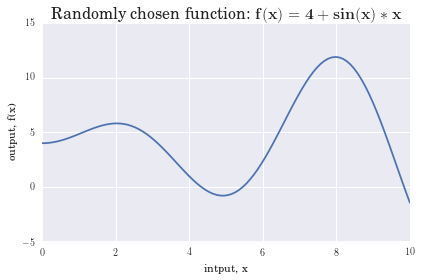

In [39]:
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
xs_ = np.linspace(0,10,100)
fig = plt.figure(figsize=(6, 4))
plt.plot(xs_,random_function(xs_))
plt.title(r"Randomly chosen function: $\bf{f(x) = 4 + sin(x)*x}$",fontsize = 16)
plt.ylabel("output, f(x)")
plt.xlabel("intput, x")
plt.ylim(-5,15)
plt.xlim(0,10)
plt.show()

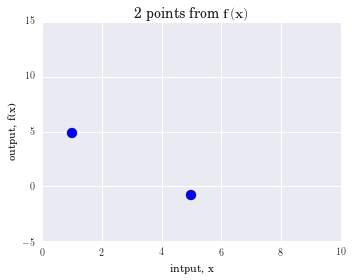

In [40]:
fig = plt.figure(figsize=(5, 4))
plt.scatter([1,5],random_function([1,5]),s=100)
plt.title(r"2 points from $\bf{f(x)}$",fontsize = 14)
plt.ylabel("output, f(x)")
plt.xlabel("intput, x")
plt.ylim(-5,15)
plt.xlim(0,10)
plt.show()

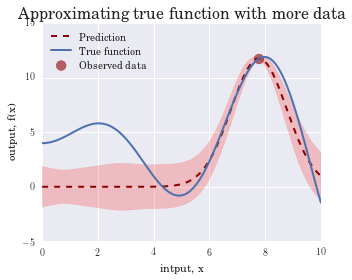

In [41]:
x_vals = np.linspace(0,10,100)
xs_ = np.linspace(0,10,10)
np.random.shuffle(xs_)
ys_ = random_function(xs_)

def animate(x):
    fig.clear()
    xs = xs_[:x+1]
    ys = ys_[:x+1]

    k_xx, k_xxs, k_xsx, k_xsxs = calculate_kernels(xs,x_vals)

    # mean and covariance function
    f_star_bar = np.dot(np.dot(k_xsx,np.linalg.inv(k_xx)),ys)
    cov_f_star = k_xsxs - np.dot(np.dot(k_xsx,np.linalg.inv(k_xx)),k_xxs)

    n_samples = len(x_vals)
    values = np.repeat(0,len(x_vals)*n_samples).reshape(n_samples,len(x_vals)).astype(float)
    for i in range(n_samples):
        values[:,i] = mvn(f_star_bar, cov_f_star)
    
    std_1 = [2*np.std(i) for i in values]
    plt.fill_between(x_vals,f_star_bar - std_1,f_star_bar + std_1,color='red',alpha=0.2)
    plt.plot(x_vals,f_star_bar,linewidth=2,color='darkred',label='Prediction',linestyle='--')
    plt.scatter(xs, ys,color='darkred',s=100,alpha=0.6,label='Observed data')
    plt.plot(x_vals,random_function(x_vals),linewidth=2,label='True function')
    plt.legend(loc='upper left')
    plt.ylim(-5,15)
    plt.xlim(0,10)
    plt.title("Approximating true function with more data",size=16)
    plt.ylabel("output, f(x)")
    plt.xlabel("intput, x")

fig = plt.figure(figsize=(5, 4))
anim = animation.FuncAnimation(fig, animate, frames=len(xs_), interval=1, blit=False)
#anim.save('GP.gif', writer='imagemagick', fps=2)
plt.show()